In [1]:
%reset
import numpy as np
import skimage.transform as tf
import pickle
from matplotlib import pyplot as plt
import math

Once deleted, variables cannot be recovered. Proceed (y/[n])? 
Nothing done.


In [133]:
def import_data():
    x = np.load('./data/x_minus_one_scaled_hist_eq_zero_mean_zca_aligned_minus_one.npy','r')
        
    with open('./data/y_resized_raster.pickle','rb') as f:
        y = pickle.load(f)
        y = y.astype(np.float32)
        
    return x, y

In [134]:
x, y = import_data()

In [135]:
def rotater(x,y):
    i = np.random.choice(range(25))
    angle = np.random.uniform(-360,360)
    img_x = x[i,...].copy()
    img_y = y[i,...].copy()
    for channel in range(x.shape[1]):
        img_x[channel,...] = tf.rotate(img_x[channel,...],
                          angle=angle,
                          order=0,
                          mode='reflect')
    for classID in range(y.shape[1]):
        img_y[classID,...] = tf.rotate(img_y[classID,...],
                          angle=angle,
                          order=0,
                          mode='reflect')
    return img_x[np.newaxis,...], img_y[np.newaxis,...]

In [136]:
for i in range(125):
    x_rot,y_rot = rotater(x,y)
    x = np.append(x,x_rot,axis=0)
    y = np.append(y,y_rot,axis=0)
print(x.shape,y.shape)

(150, 20, 136, 136) (150, 10, 136, 136)


In [137]:
from sklearn.utils import shuffle
x,y = shuffle(x,y,random_state=13)

In [138]:
y[y>0]=1

29


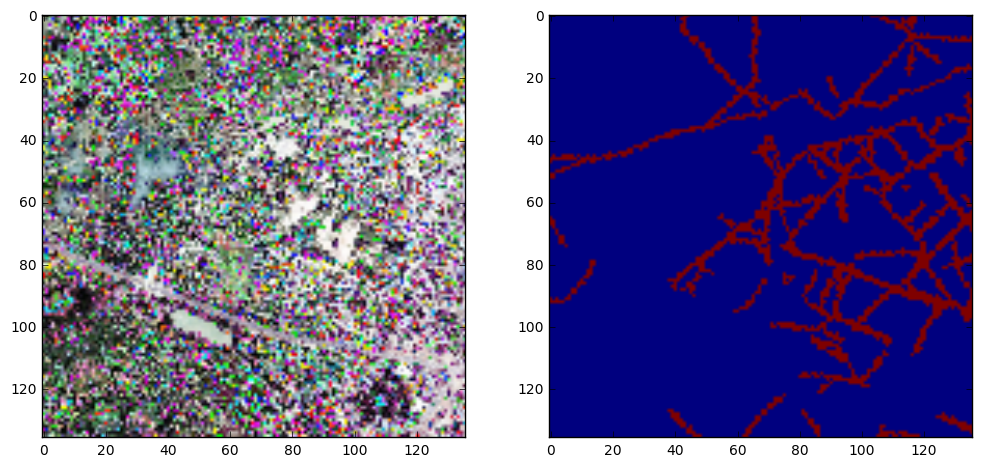

In [141]:
def plot_all(i):
    fig = plt.figure(figsize=(12,12))
    i = np.random.choice(50,1)[0]
    print(i)
    ax1 = fig.add_subplot(221)
    ax1.imshow(np.rollaxis(x[i,...],0,3)[:,:,:3])

    ax2 = fig.add_subplot(222)
    ax2.imshow(y[i,3,...])
    
    plt.show()
plot_all(5)
#push('PICTURES!','The plots are ready')

In [142]:
np.save('./data/x_augmented.npy',x)
np.save('./data/y_augmented.npy',y)